In [9]:
!pip install --upgrade sklearn

In [1]:
from PCA import PCA_2d
from sklearn.cluster import KMeans

K=3
reduced=PCA_2d()

kmeans=KMeans(n_clusters=K, max_iter=1000)
# kmeans.fit(reduced)
# pred=kmeans.predict(reduced)

# print("result:",pred)

type: <class 'numpy.ndarray'>
result: (30, 512)
pca: (30, 2)


In [2]:
kmeans.fit_predict(reduced)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2], dtype=int32)

In [17]:
import numpy as np

pred_labels=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2])
true_labels=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

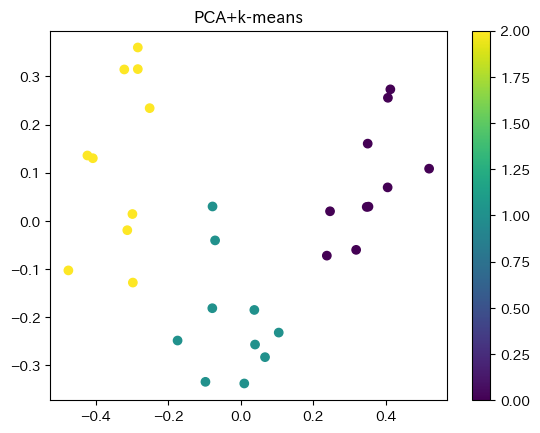

In [77]:
import matplotlib.pyplot as plt

plt.scatter(reduced[:,0], reduced[:,1], c=pred_labels)
plt.colorbar()
plt.title("PCA+k-means")
plt.savefig("./PCA_kmeans/scatterplotPCA.png")
plt.show()

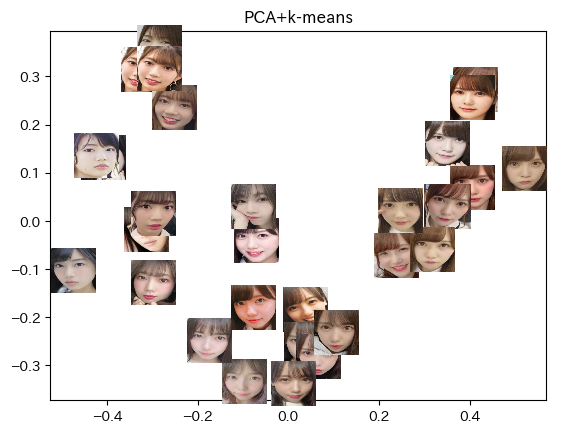

In [75]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox 
import japanize_matplotlib
import glob

def imscatter(x, y, image_path, ax=None, zoom=1): 
    if ax is None: 
        ax = plt.gca() 

    artists = [] 
    for x0, y0,image in zip(x, y,image_path): 
        image = plt.imread(image) 
        im = OffsetImage(image, zoom=zoom) 
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False) 
        artists.append(ax.add_artist(ab)) 
    return artists

x = reduced[:, 0]
y = reduced[:, 1]
fig, ax = plt.subplots() 
faces_image_paths=sorted(glob.glob("./face/*.jpg"))
imscatter(x, y, faces_image_paths, ax=ax,  zoom=.2) 
ax.plot(x, y, 'ko',alpha=0) 
ax.autoscale() 
plt.title("PCA+k-means")
plt.savefig("./PCA_kmeans/scatterPCAkm.png")
plt.show() 

違う人物だが同じクラスタに属している写真の類似度を確認

In [5]:
from facenet_pytorch import MTCNN, InceptionResnetV1
from PIL import Image

# 160x160に切り抜き
mtcnn=MTCNN(image_size=160, margin=10)
# 512次元配列に変換
resnet=InceptionResnetV1(pretrained="vggface2").eval()

# 画像から顔部分抽出と512次元配列に変換する関数
# def img2vec(file_path,idx,out_path):
def img2vec(file_path):
    img=Image.open(file_path)
    # 顔部分の抽出
    # img_cropped=mtcnn(img, out_path+str(idx)+".jpg")
    img_cropped=mtcnn(img)

    img_enbedding=resnet(img_cropped.unsqueeze(0))
    # 1x512のリストに変換
    # v=img_enbedding.tolist()

    v=img_enbedding.squeeze().to('cpu').detach().numpy().copy()
    
    return v

In [6]:
from similarity_func import cos_similarity
import glob

images=sorted(glob.glob("./face/*.jpg"))
N=len(images)

similarity=[]

for f1 in images:
    for f2 in images:
        v1=img2vec(f1)
        v2=img2vec(f2)
        s=cos_similarity(v1,v2)
        similarity.append(s)

In [7]:
similarity=np.array(similarity)
similarity=similarity.reshape(30,30)

In [21]:
for i,f in enumerate(images):
    print(f, " : ", pred_labels[i], true_labels[i])

./face/01.jpg  :  0 0
./face/02.jpg  :  0 0
./face/03.jpg  :  0 0
./face/04.jpg  :  0 0
./face/05.jpg  :  0 0
./face/06.jpg  :  0 0
./face/07.jpg  :  0 0
./face/08.jpg  :  0 0
./face/09.jpg  :  0 0
./face/10.jpg  :  0 0
./face/11.jpg  :  2 1
./face/12.jpg  :  1 1
./face/13.jpg  :  1 1
./face/14.jpg  :  1 1
./face/15.jpg  :  1 1
./face/16.jpg  :  1 1
./face/17.jpg  :  1 1
./face/18.jpg  :  1 1
./face/19.jpg  :  1 1
./face/20.jpg  :  1 1
./face/21.jpg  :  2 2
./face/22.jpg  :  2 2
./face/23.jpg  :  2 2
./face/24.jpg  :  2 2
./face/25.jpg  :  2 2
./face/26.jpg  :  1 2
./face/27.jpg  :  2 2
./face/28.jpg  :  2 2
./face/29.jpg  :  2 2
./face/30.jpg  :  2 2


In [82]:
import seaborn as sns
def show_heatmap(s,path,t):
    plt.figure(figsize=(15,15))
    sns.heatmap(s, annot=True, fmt="1.2f",cmap="Blues")
    plt.title("PCA+kmeansでのコサイン類似度:"+t)
    plt.savefig(path)
    plt.show()

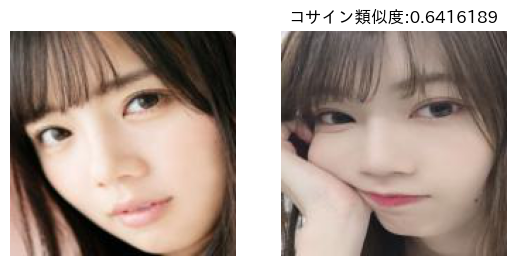

In [88]:
from PIL import Image

f1="./face/11.jpg"
f2="./face/26.jpg"
f=[f1,f2]
v1=img2vec(f[0])
v2=img2vec(f[1])

for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(Image.open(f[i]))

    plt.axis("off")
    
plt.title("コサイン類似度:"+str(cos_similarity(v1,v2)))
plt.show()


# print("コサイン類似度:",cos_similarity(v1,v2))
# print("齊藤京子の間違い：",similarity[10])
# print("高本彩花の間違い：",similarity[25])

In [ ]:
"""
11.jpg
正しく齊藤京子と認識する確率：50
間違えて高本彩花と認識する確率：60
"""

"""
26.jpg
正しく高本彩花と認識する確率：80
間違えて齊藤京子と認識する確率：60
"""


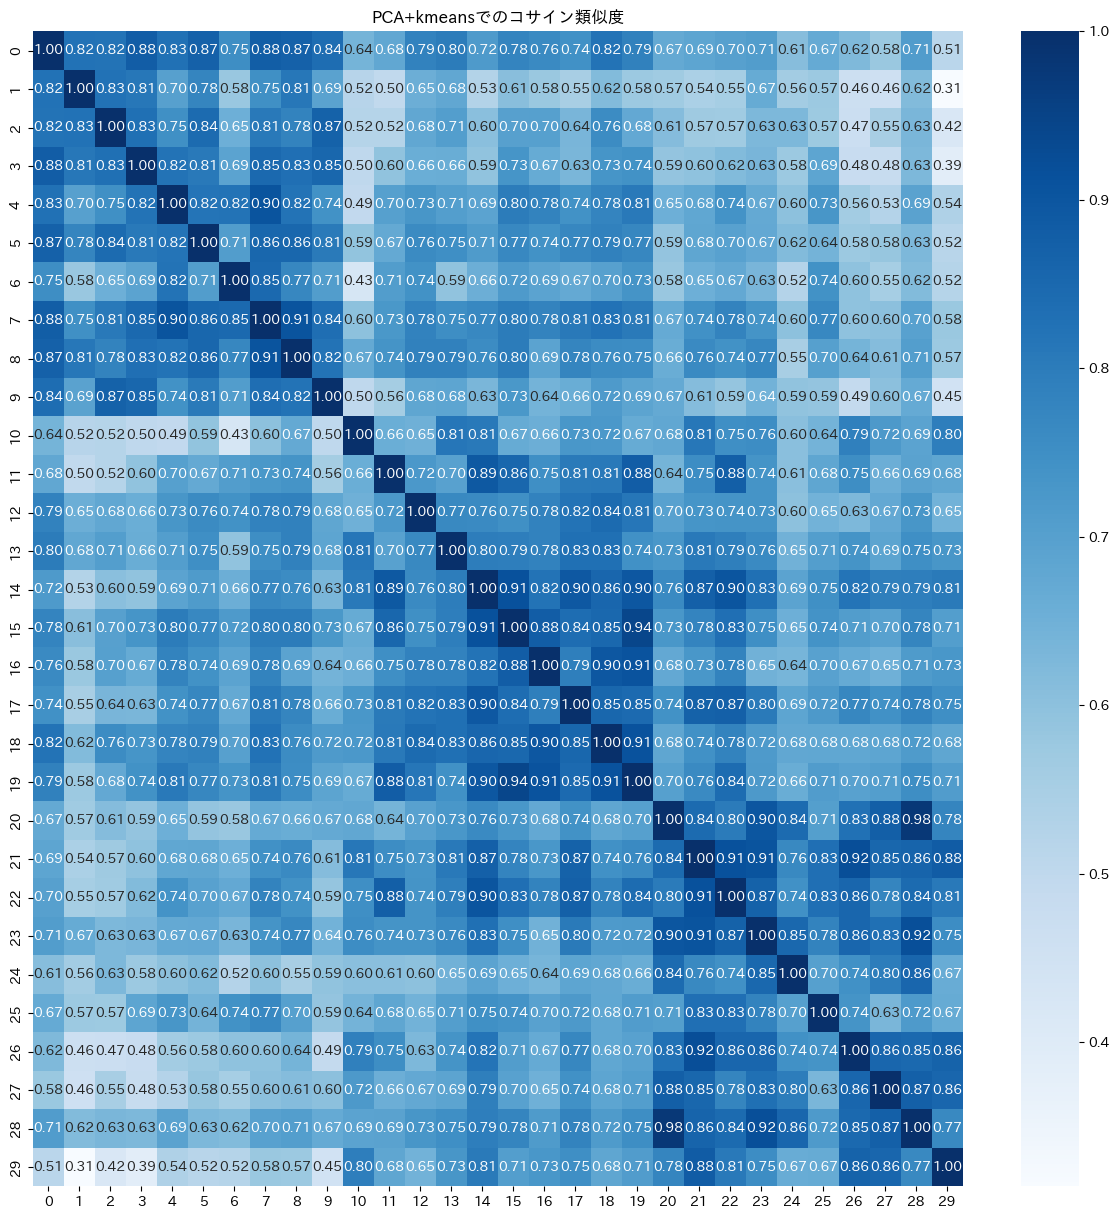

In [80]:
# 誤分類した画像のコサイン類似度

similarity_fault=similarity[:,:]
show_heatmap(similarity_fault,path="./PCA_kmeans/heatmapPCA.png")

加藤史帆

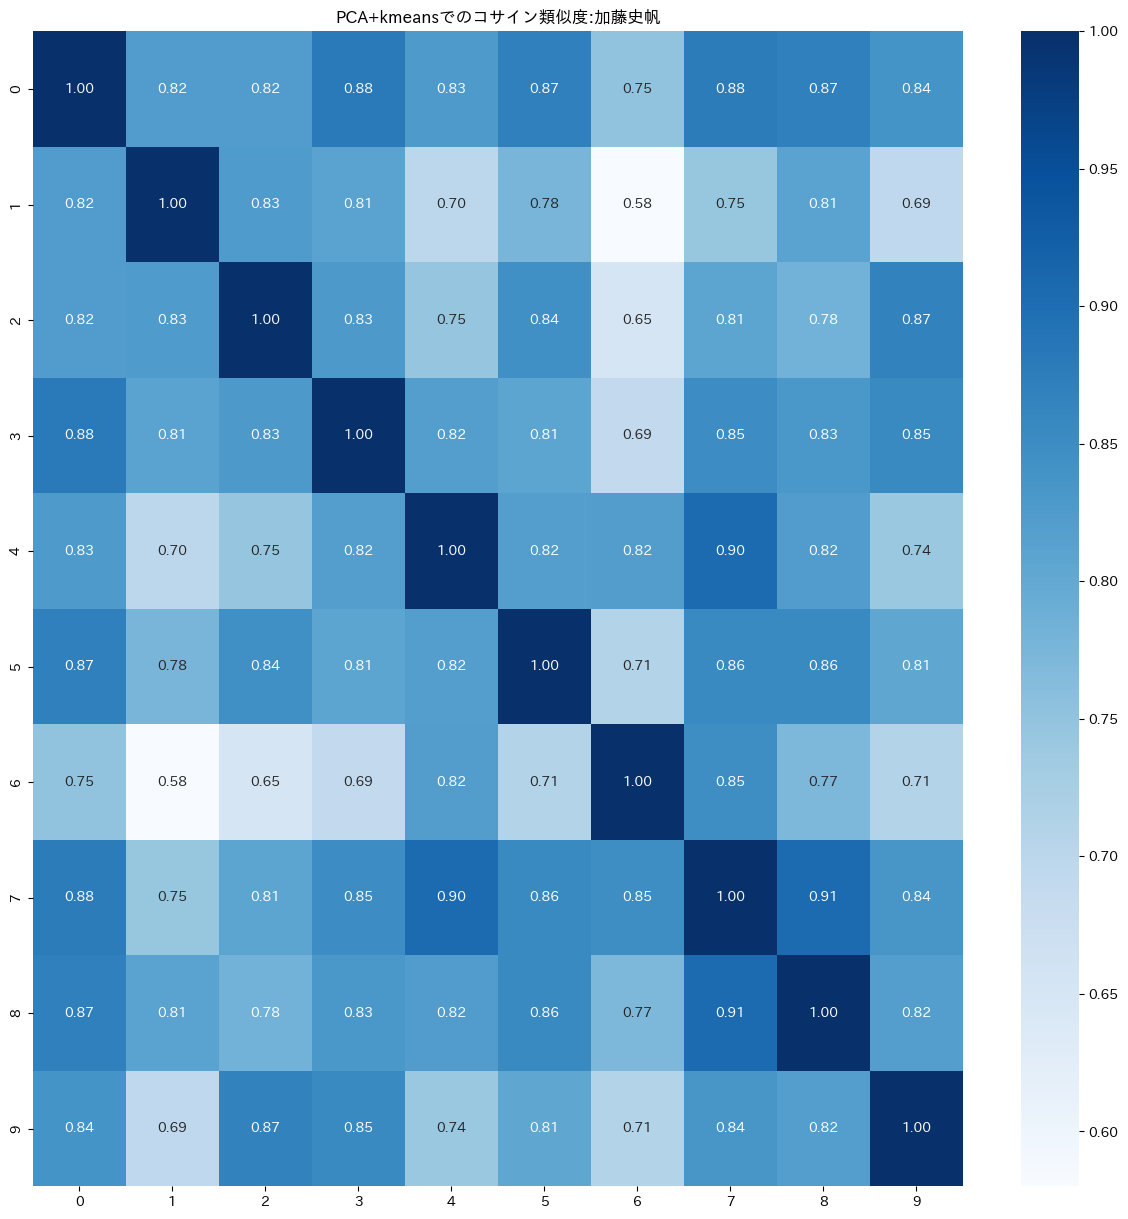

In [83]:
similarity1=similarity[:10,:10]
show_heatmap(similarity1,path="./PCA_kmeans/katoshi.png", t="加藤史帆")

齊藤京子

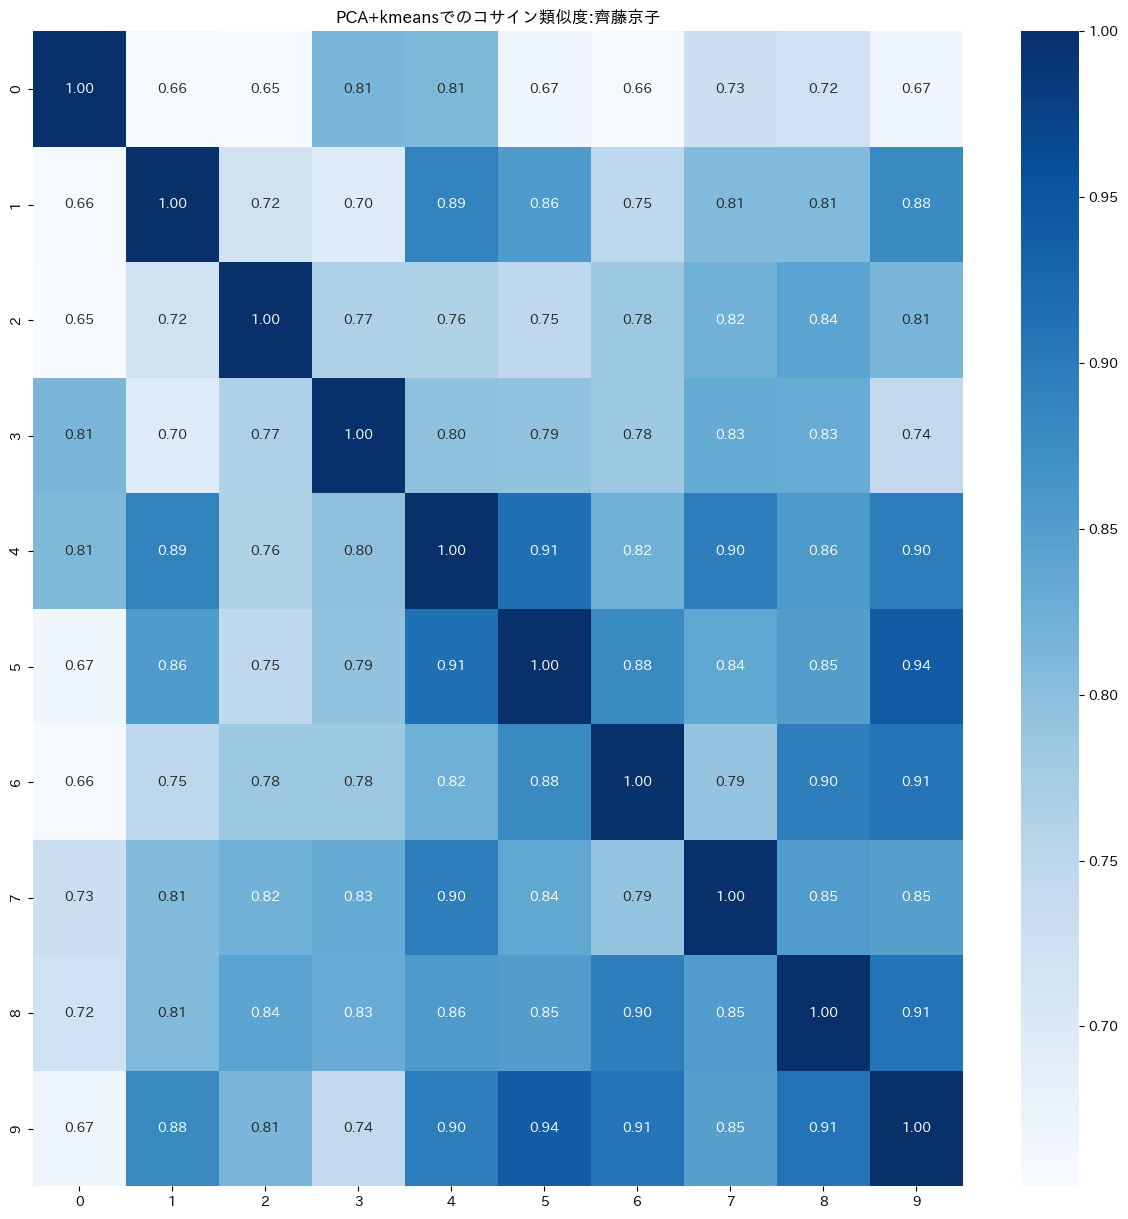

In [85]:
similarity2=similarity[10:20,10:20]
show_heatmap(similarity2,path="./PCA_kmeans/kyoko.png", t="齊藤京子")

高本彩花

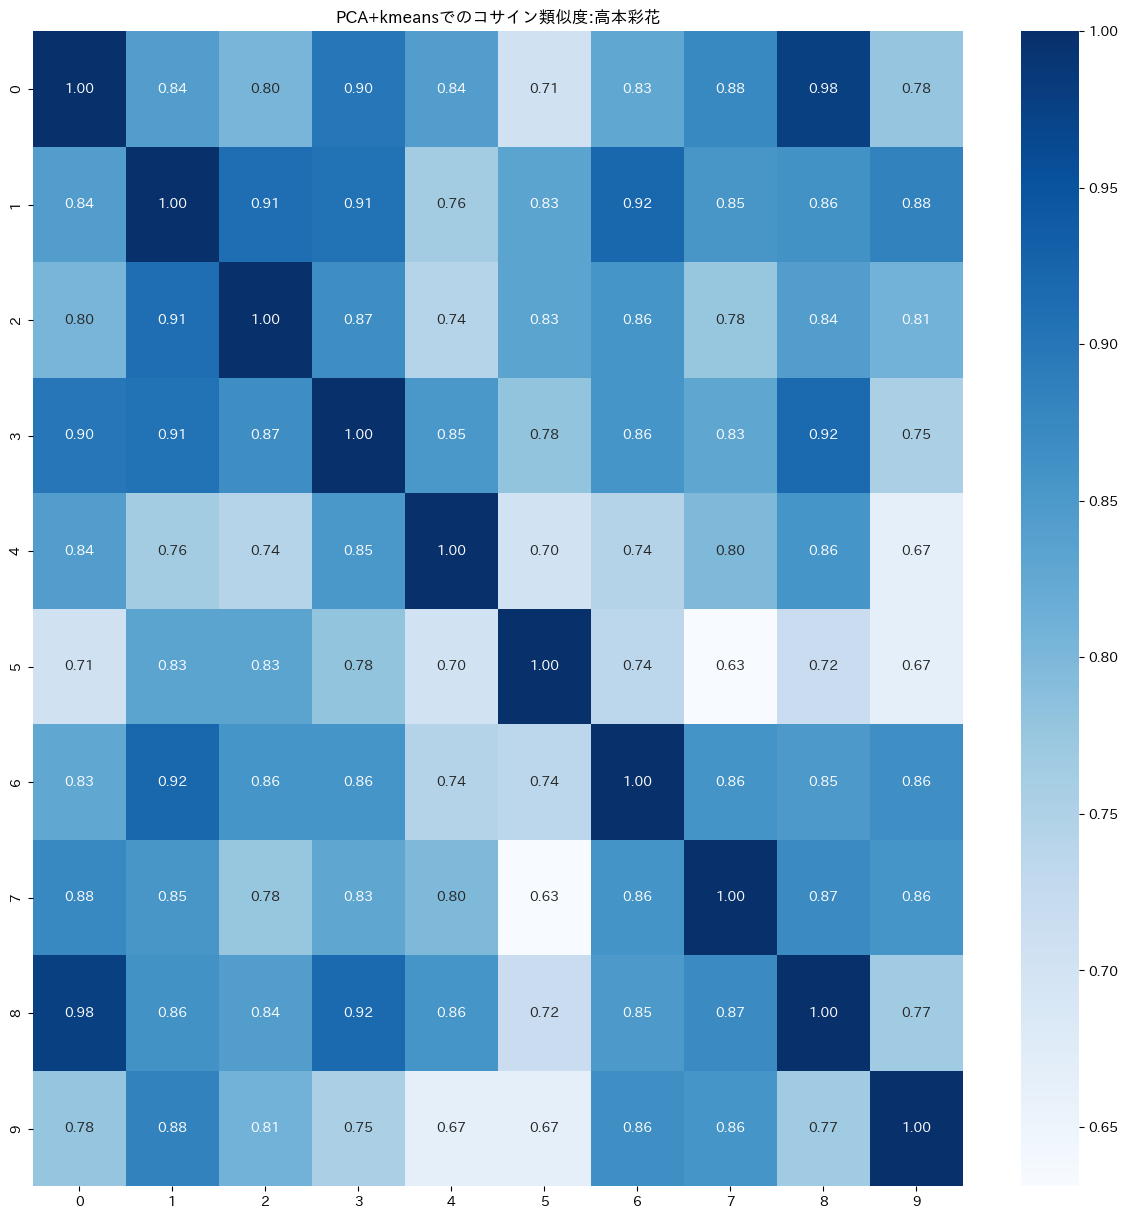

In [86]:
similarity3=similarity[20:30,20:30]
show_heatmap(similarity3,path="./PCA_kmeans/otake.png", t="高本彩花")